In [2]:
import numpy as np
import pandas as pd
import neural_network_batch as nn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_addresses=["Datasets/tweets/train.csv"]

In [3]:
class FileReader:
    def __init__(self,data_addresses):
        '''
        data_addresses is the list of addresses of files from where you want to read the data
        =======
        Format:
        =======
        sentence \t score \n
        '''
        self.data_addresses=data_addresses

    def read_data(self):
        data=np.empty((0,2))
        for add in self.data_addresses:
            df=pd.read_csv(add)
            df=df.iloc[:,1:]#ignore the id column
            
            data=np.concatenate((data,np.array(df)))
        data[:,[0,1]]=data[:,[1,0]]
        return data

    def get_vocabulary(self,data):
        self.word_to_number={}
        index=0
        for str in data[:,0]:
            for word in str.split():
                if not(word in self.word_to_number):
                    self.word_to_number[word]=index
                    index+=1

        self.number_to_word=dict((v,k) for k,v in self.word_to_number.items())

    def vectorize(self,data):
        converted_data=np.zeros((data.shape[0],self.total_words+1),dtype=np.bool8)# last entry for the label
        print(converted_data.shape)
        for i in range(data.shape[0]):
            for word in data[i][0].split():
                converted_data[i][self.word_to_number[word]]=1
            converted_data[i][-1]=data[i][1]#correct label
        return converted_data

    def generate_data(self,split=0.8):
        data=self.read_data()
        self.get_vocabulary(data)
        self.total_words=len(self.word_to_number)
        self.data=self.vectorize(data)
        split=int(split*self.data.shape[0])
        self.x_train=self.data[0:split,:-1]
        self.x_test=self.data[split:,:-1]
        self.y_train=self.data[0:split,-1]
        self.y_test=self.data[split:,-1]

    

In [4]:
fr=FileReader(data_addresses)
fr.generate_data()


(31962, 67224)


In [5]:

print(fr.x_train.shape)
print(fr.y_train.shape)
print(fr.x_test.shape)
print(fr.y_test.shape)

(25569, 67223)
(25569,)
(6393, 67223)
(6393,)


In [6]:
x_train=fr.x_train
y_train=fr.y_train
x_test=fr.x_test
y_test=fr.y_test

# also make one validaiton set from x_train
split=int(x_train.shape[0]*0.5)
x_valid,y_valid,x_train,y_train=(x_train[split:-1],y_train[split:-1],x_train[0:split],y_train[0:split])
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(12784, 67223)
(12784,)
(12784, 67223)
(12784,)


In [11]:
model=nn.NeuralNetwork(3,[16,16,2],100,'tanh')

In [12]:
nn.train?

In [16]:
losses,valid_losses=nn.train(model,x_train[:,:100],y_train.astype('int64'),100,0.01,500,True,5,x_valid[:,:100],y_valid.astype('int64'))

Iteration 0, loss= 3.8730331088268724
Iteration 5, loss= 2.7124848929404344
Iteration 10, loss= 2.4942310639464327
Iteration 15, loss= 1.7635411600832989
Iteration 20, loss= 3.600804179213455
Iteration 25, loss= 1.5947647133595644
Iteration 30, loss= 2.4348671689425108
Iteration 35, loss= 2.074266039937253
Iteration 40, loss= 0.6768244050604629
Iteration 45, loss= 2.005237274744674
Iteration 50, loss= 3.1340346809303403
Iteration 55, loss= 0.27133333422077216
Iteration 60, loss= 1.5514660202554813
Iteration 65, loss= 1.8304872538913755
Iteration 70, loss= 2.94627531967779
Iteration 75, loss= 0.3907081564138714
Iteration 80, loss= 1.969227301819902
Iteration 85, loss= 0.22453446753326
Iteration 90, loss= 0.16845241238847242
Iteration 95, loss= 1.6862276146847233


In [37]:
df=pd.read_csv("Datasets/tweets/train.csv",sep=',', index_col=False)

In [38]:
print(df.head())
df=df[['tweet','label']]


   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


<AxesSubplot:xlabel='label', ylabel='count'>

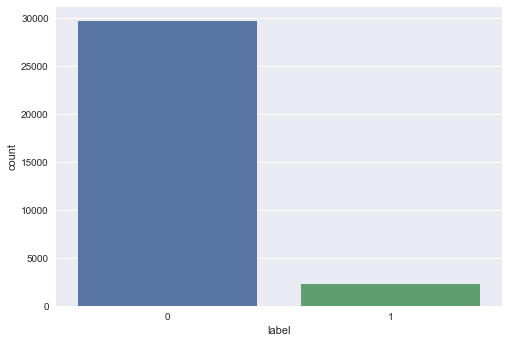

In [39]:
plt.style.use('seaborn')
sns.countplot(x='label',data=df)

In [40]:
df.head()

,tweet,label
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


In [41]:
df.shape

(31962, 2)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   31962 non-null  object
 1   label   31962 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


 We dont have any null values in any column

In [43]:
s=set()

In [44]:
for i in df.iloc[:,0]:
    s.update(i.split())

In [45]:
print("Total No of words is {}".format(len(s)))

Total No of words is 67223


In [46]:
df.shape

(31962, 2)

we have LOTs of total words. So we need to remove some of the words

In [48]:
print(pd.unique(df['label']))

[0 1]


Only two unique moods 0 and 4

In [49]:

df.head()

,tweet,label
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


In [45]:
print(pd.unique(df['target']))
print(df.info())

[0 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1600000 non-null  object
 1   target  1600000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB
None


In [50]:
data=np.array(df)

In [51]:
print(data.shape,data)

(31962, 2) [[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'
  0]
 ["@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"
  0]
 ['  bihday your majesty' 0]
 ...
 ['listening to sad songs on a monday morning otw to work is sad  ' 0]
 ['@user #sikh #temple vandalised in in #calgary, #wso condemns  act  ' 1]
 ['thank you @user for you follow  ' 0]]


In [52]:
from nltk.tokenize import RegexpTokenizer

In [53]:

def split_(str):
    tk=RegexpTokenizer('\S*[@.]\S*')# words containing @ or . (like websites) are of no use 
    s=set(tk.tokenize(str))
    str=[w for w in str.split() if w not in s]
    tk = RegexpTokenizer('[a-zA-a]+')# only words
    return (" ".join(tk.tokenize(" ".join(str)))).lower()# return string having only simple words
    
    



In [54]:
str="t Gagan Walia 1,2,3 gaganwalia212@gmail.com @gaganWalia gaganw@@@ a #myBiden!!  www.google.com ??? , "
print(split_(str))

t gagan walia a mybiden


# Data Preprocessing using NLTK

## Split the words
#### We dont need numbers, websites,usernames(start with @),emails,
#### Need only simple words
#### Hashtags are important but only their names.


In [55]:
data[:,0]=(np.vectorize(split_)(data[:,0]))

In [56]:
print(data)

[['when a father is dysfunctional and is so selfish he drags his kids into his run'
  0]
 ['thanks for lyft credit i can t use cause they don t offer wheelchair vans in disapointed getthanked'
  0]
 ['bihday your majesty' 0]
 ...
 ['listening to sad songs on a monday morning otw to work is sad' 0]
 ['sikh temple vandalised in in calgary wso condemns act' 1]
 ['thank you for you follow' 0]]


### Remove the stopwords

In [57]:
stopwordlist = set(['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves',
               "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", 
                "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", 
                "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", 
                "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", 
                "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", 
                "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", 
                "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", 
                "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", 
                "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just",
                "don", "should", "now"])

In [58]:
def remove_stopwords(str):
    return " ".join([w for w in str.split() if w not in stopwordlist ])
data[:,0]=(np.vectorize(remove_stopwords)(data[:,0]))


In [59]:
print(data)

[['father dysfunctional selfish drags kids run' 0]
 ['thanks lyft credit use cause offer wheelchair vans disapointed getthanked'
  0]
 ['bihday majesty' 0]
 ...
 ['listening sad songs monday morning otw work sad' 0]
 ['sikh temple vandalised calgary wso condemns act' 1]
 ['thank follow' 0]]


In [60]:
s=set()
for w in data[:,0]:
    s.update(w.split())

In [61]:
print("Total no of words now = {}".format(len(s)))

Total no of words now = 36496


In [62]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer


In [63]:
porter=PorterStemmer()
lancaster=LancasterStemmer()

In [64]:
print(porter.stem("Lovely"),lancaster.stem("Lovely"))

love lov


In [65]:
print(porter.stem("daring"),lancaster.stem("daring"))

dare dar


In [66]:
print(porter.stem("better"),lancaster.stem("better"))

better bet


In [67]:
def stem_on_sentence(str):
    return " ".join([porter.stem(w) for w in str.split()])
data[:,0]=(np.vectorize(stem_on_sentence)(data[:,0]))

In [68]:
data

array([['father dysfunct selfish drag kid run', 0],
       ['thank lyft credit use caus offer wheelchair van disapoint getthank',
        0],
       ['bihday majesti', 0],
       ...,
       ['listen sad song monday morn otw work sad', 0],
       ['sikh templ vandalis calgari wso condemn act', 1],
       ['thank follow', 0]], dtype=object)

In [69]:
s=set()
for w in data[:,0]:
    s.update(w.split())
print("Total no of words now = {}".format(len(s)))

Total no of words now = 30651


### Create vocabulary

In [174]:
vocab={}
freq={}
i=0
for x in data[:,0]:
    for word in x.split():
        if(word not in freq):  
            freq[word]=1
        else:
            freq[word]+=1

In [175]:
for x in data[:,0]:
    for word in x.split():
        if(word not in vocab and freq[word]>20):
            vocab[word]=i
            i+=1
            

In [176]:
print(len(vocab),vocab)

1659 {'father': 0, 'kid': 1, 'run': 2, 'thank': 3, 'use': 4, 'caus': 5, 'offer': 6, 'bihday': 7, 'model': 8, 'love': 9, 'u': 10, 'take': 11, 'time': 12, 'ur': 13, 'societi': 14, 'motiv': 15, 'huge': 16, 'fan': 17, 'big': 18, 'talk': 19, 'pay': 20, 'get': 21, 'camp': 22, 'tomorrow': 23, 'next': 24, 'school': 25, 'year': 26, 'think': 27, 'exam': 28, 'hate': 29, 'imagin': 30, 'girl': 31, 'land': 32, 'cav': 33, 'cleveland': 34, 'welcom': 35, 'ireland': 36, 'price': 37, 'mom': 38, 'climb': 39, 'previou': 40, 'may': 41, 'blog': 42, 'silver': 43, 'gold': 44, 'forex': 45, 'orlando': 46, 'orlandoshoot': 47, 'heabreak': 48, 'valu': 49, 'see': 50, 'daddi': 51, 'today': 52, 'day': 53, 'cnn': 54, 'call': 55, 'middl': 56, 'build': 57, 'wall': 58, 'comment': 59, 'australia': 60, 'seashepherd': 61, 'angri': 62, 'got': 63, 'omg': 64, 'posit': 65, 'retweet': 66, 'agre': 67, 'friday': 68, 'smile': 69, 'around': 70, 'via': 71, 'make': 72, 'peopl': 73, 'know': 74, 'essenti': 75, 'oil': 76, 'made': 77, 'eur

In [177]:
vocab_rev=dict([(x,y) for y,x in vocab.items()])

In [178]:
vocab_rev

{0: 'father',
 1: 'kid',
 2: 'run',
 3: 'thank',
 4: 'use',
 5: 'caus',
 6: 'offer',
 7: 'bihday',
 8: 'model',
 9: 'love',
 10: 'u',
 11: 'take',
 12: 'time',
 13: 'ur',
 14: 'societi',
 15: 'motiv',
 16: 'huge',
 17: 'fan',
 18: 'big',
 19: 'talk',
 20: 'pay',
 21: 'get',
 22: 'camp',
 23: 'tomorrow',
 24: 'next',
 25: 'school',
 26: 'year',
 27: 'think',
 28: 'exam',
 29: 'hate',
 30: 'imagin',
 31: 'girl',
 32: 'land',
 33: 'cav',
 34: 'cleveland',
 35: 'welcom',
 36: 'ireland',
 37: 'price',
 38: 'mom',
 39: 'climb',
 40: 'previou',
 41: 'may',
 42: 'blog',
 43: 'silver',
 44: 'gold',
 45: 'forex',
 46: 'orlando',
 47: 'orlandoshoot',
 48: 'heabreak',
 49: 'valu',
 50: 'see',
 51: 'daddi',
 52: 'today',
 53: 'day',
 54: 'cnn',
 55: 'call',
 56: 'middl',
 57: 'build',
 58: 'wall',
 59: 'comment',
 60: 'australia',
 61: 'seashepherd',
 62: 'angri',
 63: 'got',
 64: 'omg',
 65: 'posit',
 66: 'retweet',
 67: 'agre',
 68: 'friday',
 69: 'smile',
 70: 'around',
 71: 'via',
 72: 'make',


In [179]:
total_no_of_features=len(vocab)

In [180]:
converted_data=np.full((data.shape[0],total_no_of_features+1),0,dtype='int8')# last column will store labels

In [181]:
converted_data.shape

(31962, 1660)

In [182]:
for i in range(data.shape[0]):
    for word in data[i][0].split():
        if(word in vocab):
            converted_data[i][vocab[word]]=1
    converted_data[i][-1]=data[i][1]

In [284]:
np.random.seed(0)
np.random.shuffle(data)
split=0.85
split=int(0.85*data.shape[0])
x_train=converted_data[:split,:-1]
y_train=converted_data[:split,-1]
x_test=converted_data[split:,:-1]
y_test=converted_data[split:,-1]
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(27167, 1659) (27167,) (4795, 1659) (4795,)


In [285]:
def sigmoid(x):
    #sigmoid
    return 1/(1+np.exp(-x));
    #relu function
    y=x
    y[x<0]=0
    return y

def relu(x):
    #relu function
    y=x
    y[x<0]=0
    return y


def tan_inv(x):
    #tanh
    return np.tanh(x)

activations={'sigmoid':sigmoid,'relu':relu,'tanh':tan_inv}

def sigmoid_diff(x):
    # first differential of activation function
    #sigmoid:
    """
    sigmoid'(x)=sigmoid(x)*(1-sigmoid(x))
    """
    sig=sigmoid(x)
    return sig*(1-sig) # element wise multiplication
def relu_diff(x):
    # first differential of activation function
    #relu:
    y=x
    y[x<0]=0
    y[x>0]=1
    return y
def tanh_diff(x):
    # first differential of activation function
    #tanh
    y=tan_inv(x)
    return (1-np.square(y))
activations_differential={'sigmoid':sigmoid_diff,'relu':relu_diff,'tanh':tanh_diff}



def softmax(a):
    maxm=np.max(a)
    a-=maxm
    exp_a=np.exp(a)
    exp_sum=np.sum(exp_a,axis=1,keepdims=True)
    return exp_a/exp_sum

class NeuralNetwork:
    def __init__(self,input_size,output_size,hidden,activation_function):
        np.random.seed(0)
        model={}# dictionary
        """
        input layer--(W1,B1)-->layer1--(W2,B2)-->layer2--(W3,B3)-->output layer
        """
        
        # from input layer to layer 1
        model['W1']=np.random.randn(input_size,hidden[0])
        model['B1']=np.zeros((1,hidden[0]))
        
        # from layer 1 to layer 2
        model['W2']=np.random.randn(hidden[0],hidden[1])
        model['B2']=np.zeros((1,hidden[1]))
        
        # from  layer 2 to output layer
        model['W3']=np.random.randn(hidden[1],output_size)
        model['B3']=np.zeros((1,output_size))
        
        """
        for x in model:
            print(x,model[x].shape)
        """
        self.model=model
        self.activation=activations[activation_function]
        self.activation_diff=activations_differential[activation_function]
    def forward_propagation(self,X):
        """
        X--> Matrix of size m X n where m is the no of examples and n=input_size
        """
        model=self.model
        W1,W2,W3=model['W1'],model['W2'],model['W3']
        b1,b2,b3=model['B1'],model['B2'],model['B3']
        activation=self.activation
        
        z1=np.dot(X,W1)+b1
        a1=activation(z1)
        
        z2=np.dot(a1,W2)+b2
        a2=activation(z2)
        
        z3=np.dot(a2,W3)+b3
        a3=softmax(z3)
        #print(a3)
        #print(a3.sum(axis=1))
        self.activations=(a1,a2,a3,z1,z2,z3)
        return a3
        
    def backward_propagation(self,x,y,learning_rate=0.001):
        model=self.model
        W1,W2,W3=model['W1'],model['W2'],model['W3']
        b1,b2,b3=model['B1'],model['B2'],model['B3']
        (a1,a2,a3,z1,z2,z3)=self.activations
        activation_diff=self.activation_diff
        
        
        delta3=a3-y
        dw3=np.dot(a2.T,delta3)
        db3=np.sum(delta3,axis=0)
        
        
        delta2=np.dot(delta3,W3.T)*(activation_diff(z2))
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2,axis=0)
        
        
        delta1=np.dot(delta2,W2.T)*(activation_diff(z1))
        dw1=np.dot(x.T,delta1)
        db1=np.sum(delta1,axis=0)
        
        # update
        self.model["W3"]-=learning_rate*dw3
        self.model["B3"]-=learning_rate*db3
        
        self.model["W2"]-=learning_rate*dw2
        self.model["B2"]-=learning_rate*db2
        
        self.model["W1"]-=learning_rate*dw1
        self.model["B1"]-=learning_rate*db1
        


    def predict(self,x):
        y_=self.forward_propagation(x)
        return np.argmax(y_,axis=1);
    def summary(self):
        model=self.model
        W1,W2,W3=model['W1'],model['W2'],model['W3']
        print(W1,W2,W3)
        
    def loss(self,y_oht,y_):
        y_[y_<=0]=0.000000001
        return -np.mean(y_oht*np.log(y_))
        
        

        # convert the simple labels into one hot vector
def convert_to_oht(y,no_of_classes):
    m=y.shape[0]
    y_oht=np.zeros((m,no_of_classes))
    y_oht[range(m),y]=1
    return y_oht

def train(model,X,y,no_of_classes,epochs=200,learning_rate=0.0001,logs=True):
    y_oht=convert_to_oht(y,no_of_classes)
    losses=[]
    for i in range(epochs):
        y_=model.forward_propagation(X)
        l=model.loss(y_oht,y_)
        losses.append(l)
        if(logs):
            print("Iteration {}, loss= {}".format(i,l))
        model.backward_propagation(X,y_oht,learning_rate)
    return losses

def visualize_decision_boundry(X,Y,model):
    # X is only two featured
    [x0_min,x1_min]=np.min(X,axis=0)
    [x0_max,x1_max]=np.max(X,axis=0)
    x0=np.linspace(x0_min,x0_max,100)
    x1=np.linspace(x1_min,x1_max,100)
    x0,x1=np.meshgrid(x0,x1)
    x=np.zeros((x0.shape[0]*x0.shape[1],2))
    x[:,0]=x0.reshape(-1)
    x[:,1]=x1.reshape(-1)
    y_=model.predict(x)
    print(x.shape)
    print(y_.shape)
    
    plt.scatter(x[:,0],x[:,1],c=y_,cmap=plt.get_cmap('Accent'))
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.get_cmap("rainbow"))
    

In [286]:
model=NeuralNetwork(x_train.shape[1],2,[20,20],'tanh')

In [287]:
losses=train(model,x_train,y_train,2,200,0.00005,True)

Iteration 0, loss= 1.2392615333746912
Iteration 1, loss= 0.3130601191034268
Iteration 2, loss= 0.2621965392273528
Iteration 3, loss= 0.23398483207951706
Iteration 4, loss= 0.2154854887329113
Iteration 5, loss= 0.20201500625834387
Iteration 6, loss= 0.19153203113436137
Iteration 7, loss= 0.18306322239689282
Iteration 8, loss= 0.17605627813563254
Iteration 9, loss= 0.17016114727693
Iteration 10, loss= 0.16513844663155133
Iteration 11, loss= 0.16081547743458757
Iteration 12, loss= 0.1570628741984769
Iteration 13, loss= 0.15378111152150917
Iteration 14, loss= 0.1508921114151854
Iteration 15, loss= 0.1483337026119096
Iteration 16, loss= 0.14605579422177775
Iteration 17, loss= 0.14401764216717533
Iteration 18, loss= 0.1421858425341854
Iteration 19, loss= 0.14053282357162794
Iteration 20, loss= 0.13903568832650254
Iteration 21, loss= 0.13767530975572356
Iteration 22, loss= 0.13643561249591313
Iteration 23, loss= 0.13530299698064366
Iteration 24, loss= 0.13426587584119729
Iteration 25, loss= 0

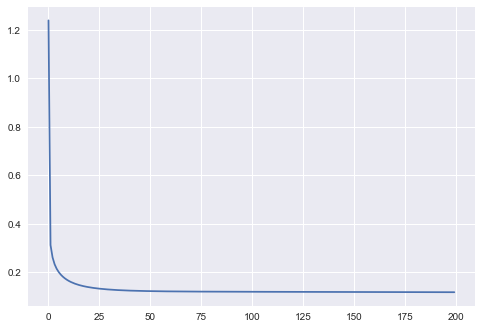

In [289]:
plt.plot(losses)

In [290]:
y_=model.predict(x_train)

In [291]:
print(np.mean(np.array(y_train==y_)))

0.9299885890970663


In [292]:
y_=model.predict(x_test)

In [293]:
print(np.mean(np.array(y_test==y_)))

0.9290928050052137
